In [1]:
import pandas as pd
raw_df = pd.read_csv("../tuntun_data/Daily93Tuntun_2010-2021.csv")
raw_df = raw_df[pd.to_datetime(raw_df['date']) > pd.Timestamp('2009-01-01')]
raw_df = raw_df[~raw_df['tic'].str.contains('-')]
raw_df = raw_df.drop_duplicates(subset=['date', 'tic'])
raw_df

,date,open,high,low,close,volume,tic,day
134,2010-05-03,2800.0,2800.0,2800.0,2800.0,0,ALFA,4234
135,2010-05-03,162.0,162.0,162.0,162.0,500,ANTA,4234
137,2010-05-03,1050.0,1050.0,1050.0,1050.0,0,DYNA,4234
142,2010-05-04,2800.0,2800.0,2800.0,2800.0,0,ALFA,4235
143,2010-05-04,162.0,162.0,162.0,162.0,0,ANTA,4235
...,...,...,...,...,...,...,...,...
456815,2021-12-30,840.0,860.0,800.0,800.0,20900,YPAS,7079
456816,2021-12-30,1410.0,1560.0,1360.0,1510.0,117600,YULE,7079
456817,2021-12-30,650.0,655.0,625.0,645.0,1667500,ZBRA,7079
456818,2021-12-30,105.0,107.0,103.0,105.0,933951600,ZINC,7079


In [2]:
raw_df['date'] = pd.to_datetime(raw_df['date'])
raw_df = raw_df.sort_values('date').reset_index(drop=True)
date_mapping = {date: i+1 for i, date in enumerate(raw_df['date'].unique())}
raw_df['day'] = raw_df['date'].map(date_mapping)
raw_df

,date,open,high,low,close,volume,tic,day
0,2010-05-03,2800.0,2800.0,2800.0,2800.0,0,ALFA,1
1,2010-05-03,162.0,162.0,162.0,162.0,500,ANTA,1
2,2010-05-03,1050.0,1050.0,1050.0,1050.0,0,DYNA,1
3,2010-05-04,2800.0,2800.0,2800.0,2800.0,0,ALFA,2
4,2010-05-04,162.0,162.0,162.0,162.0,0,ANTA,2
...,...,...,...,...,...,...,...,...
373483,2021-12-30,222.0,222.0,222.0,222.0,0,GIAA,2435
373484,2021-12-30,670.0,670.0,660.0,665.0,1904600,GJTL,2435
373485,2021-12-30,218.0,228.0,214.0,214.0,195700,GLOB,2435
373486,2021-12-30,50.0,50.0,50.0,50.0,0,KPAL,2435


In [3]:
# Step 1: Count rows where 'volume' is 0 for each 'tic'
volume_zero_count = raw_df[raw_df['volume'] == 0].groupby('tic').size()

# Step 2: Sort the counts in descending order
sorted_volume_zero_count = volume_zero_count.sort_values(ascending=True)

# Step 3: Get 100 tickers with the least amount of days where its 'volume' is 0
top_n_tic = sorted_volume_zero_count.head(100)
tickers = top_n_tic.index.tolist()
df = raw_df[raw_df["tic"].isin(tickers)]
df

,date,open,high,low,close,volume,tic,day
19139,2019-12-10,1390.00,1445.00,1390.0,1425.0,50000,PANS,1934
19140,2019-12-10,1000.00,1000.00,980.0,995.0,229100,PBID,1934
19141,2019-12-10,437.89,462.02,424.1,424.1,20157,PBRX,1934
19148,2019-12-10,4310.00,4310.00,3580.0,3580.0,602800,PICO,1934
19149,2019-12-10,955.00,960.00,955.0,955.0,49200,PJAA,1934
...,...,...,...,...,...,...,...,...
373446,2021-12-30,89.00,89.00,87.0,87.0,3064300,GPRA,2435
373450,2021-12-30,190.00,190.00,182.0,183.0,561400,GWSA,2435
373467,2021-12-30,530.00,535.00,505.0,510.0,4814600,FITT,2435
373481,2021-12-30,785.00,795.00,760.0,780.0,65400,GGRP,2435


In [4]:
len(sorted_volume_zero_count)

538

In [28]:
# volume_zero_count_one = sorted_volume_zero_count[sorted_volume_zero_count == 1]
# len(volume_zero_count_one)

In [29]:
# volume_zero_count_one_two = sorted_volume_zero_count[sorted_volume_zero_count <= 10]
# len(volume_zero_count_one_two)

In [6]:
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by 'date' to ensure chronological order
df = df.sort_values('date').reset_index(drop=True)

# Create a mapping of unique dates to sequential numbers starting from 1
date_mapping = {date: i+1 for i, date in enumerate(df['date'].unique())}

# Map the 'date' column to the new 'day' values
df['day'] = df['date'].map(date_mapping)

# Display the first few rows to verify
print(df)

            date     open     high      low    close  volume   tic  day
0     2019-12-10  1390.00  1445.00  1390.00  1425.00   50000  PANS    1
1     2019-12-10   272.02   272.02   267.03   269.53  338995  ARTO    1
2     2019-12-10    50.00    50.00    50.00    50.00   36700  BAPI    1
3     2019-12-10   117.05   117.05   117.05   117.05    1837  BEKS    1
4     2019-12-10    64.00    69.00    64.00    67.00  380000  BCIP    1
...          ...      ...      ...      ...      ...     ...   ...  ...
50195 2021-12-30   990.00   990.00   970.00   970.00   15800  MFMI  502
50196 2021-12-30  7600.00  8000.00  7600.00  7800.00   76900  MLBI  502
50197 2021-12-30  2480.00  2480.00  2480.00  2480.00       0  MSIN  502
50198 2021-12-30   222.00   222.00   218.00   220.00   91500  TOTO  502
50199 2021-12-30   410.00   414.00   410.00   414.00  196600  ZONE  502

[50200 rows x 8 columns]


/tmp/ipykernel_3130679/2033473014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [10]:
from finrl.meta.env_portfolio_optimization.env_portfolio_optimization import PortfolioOptimizationEnv
df_portfolio_train = df[df["day"] < 442]
df_portfolio_test = df[df["day"] >= 442]
TIME_WINDOW = 6

environment_train = PortfolioOptimizationEnv(
        df_portfolio_train,
        initial_amount=100000,
        comission_fee_pct=0.0025,
        time_window=TIME_WINDOW,
        features=["close", "high", "low"],
        time_column="day",
        normalize_df=None, # dataframe is already normalized
        tics_in_portfolio=tickers
    )
environment_test = PortfolioOptimizationEnv(
        df_portfolio_test,
        initial_amount=100000,
        comission_fee_pct=0.0025,
        time_window=TIME_WINDOW,
        features=["close", "high", "low"],
        time_column="day",
        normalize_df=None, # dataframe is already normalized
        tics_in_portfolio=tickers
    )

In [26]:
df_portfolio_test

,date,open,high,low,close,volume,tic,day
0,2019-12-10,1390.00,1445.00,1390.00,1425.00,50000,PANS,1
1,2019-12-10,272.02,272.02,267.03,269.53,338995,ARTO,1
2,2019-12-10,50.00,50.00,50.00,50.00,36700,BAPI,1
3,2019-12-10,117.05,117.05,117.05,117.05,1837,BEKS,1
4,2019-12-10,64.00,69.00,64.00,67.00,380000,BCIP,1
...,...,...,...,...,...,...,...,...
44095,2021-10-05,50.00,50.00,50.00,50.00,15300,TOPS,441
44096,2021-10-05,7900.00,8400.00,7850.00,8000.00,87100,MLBI,441
44097,2021-10-05,368.00,368.00,344.00,346.00,1279400,MICE,441
44098,2021-10-05,895.00,920.00,870.00,920.00,49700,MFMI,441


In [39]:
import torch
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [40]:
from finrl.agents.portfolio_optimization.architectures import EIIE, EI3

In [41]:
from finrl.agents.portfolio_optimization.models import DRLAgent
model_kwargs = {
    "lr": 0.001,
    "policy": EIIE,
}
policy_kwargs = {
    "initial_features": 3,
    "k_size": 3,
    "conv_mid_features": 2,
    "conv_final_features": 20,
    "time_window": 6
}

model = DRLAgent(environment_train).get_model("pg", device, model_kwargs, policy_kwargs)

In [14]:
DRLAgent.train_model(model, episodes=100)

  0%|                                                                                                                                                     | 0/2 [00:00<?, ?it/s]

Initial portfolio value:100000
Final portfolio value: 418576.375
Final accumulative portfolio value: 4.18576375
Maximum DrawDown: -0.3018599524377992
Sharpe ratio: 2.964020317009187


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
 50%|██████████████████████████████████████████████████████████████████████▌                                                                      | 1/2 [00:50<00:50, 50.09s/it]

Initial portfolio value:100000
Final portfolio value: 2456800.25
Final accumulative portfolio value: 24.5680025
Maximum DrawDown: -0.37948977662379124
Sharpe ratio: 3.190434600956097


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:39<00:00, 49.65s/it]


In [17]:
import os
d = "trained_models/eiie"
os.makedirs(d, exist_ok=True)
model_path = f"{d}/policy_EIIE.pt"
torch.save(model.train_policy.state_dict(), model_path)

In [37]:
EIIE_results = {
    "train": environment_train._asset_memory["final"],
    "test": {},
}

# instantiate an architecture with the same arguments used in training
# and load with load_state_dict.
policy = EIIE(**policy_kwargs)
policy.load_state_dict(torch.load(model_path))

# testing
DRLAgent.DRL_validation(model, environment_test, policy=policy)
EIIE_results["test"] = environment_test._asset_memory["final"]

/tmp/ipykernel_3130679/2279313485.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  policy.load_state_dict(torch.load(model_path))
findfont: Font family 'Arial' not found.

Initial portfolio value:100000
Final portfolio value: 142222.125
Final accumulative portfolio value: 1.42222125
Maximum DrawDown: -0.18366673755339058
Sharpe ratio: 2.8612204234653014


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


In [38]:
EIIE_results = {
    "train": environment_train._asset_memory["final"],
    "test": {},
}

# instantiate an architecture with the same arguments used in training
# and load with load_state_dict.
policy = EIIE(**policy_kwargs)
policy.load_state_dict(torch.load(model_path))

# testing
DRLAgent.DRL_validation(model, environment_test, policy=policy)
EIIE_results["test"] = environment_test._asset_memory["final"]

/tmp/ipykernel_3130679/2279313485.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  policy.load_state_dict(torch.load(model_path))
findfont: Font family 'Arial' not found.

Initial portfolio value:100000
Final portfolio value: 142222.125
Final accumulative portfolio value: 1.42222125
Maximum DrawDown: -0.18366673755339058
Sharpe ratio: 2.8612204234653014


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


In [22]:
UBAH_results = {
    "train": {},
    "test": {},
}

PORTFOLIO_SIZE = len(tickers)

# train period
terminated = False
environment_train.reset()
while not terminated:
    action = [0] + [1/PORTFOLIO_SIZE] * PORTFOLIO_SIZE
    _, _, terminated, _ = environment_train.step(action)
UBAH_results["train"] = environment_train._asset_memory["final"]

# test period
terminated = False
environment_test.reset()
while not terminated:
    action = [0] + [1/PORTFOLIO_SIZE] * PORTFOLIO_SIZE
    _, _, terminated, _ = environment_test.step(action)
UBAH_results["test"] = environment_test._asset_memory["final"]

Initial portfolio value:100000
Final portfolio value: 185469.5625
Final accumulative portfolio value: 1.854695625
Maximum DrawDown: -0.3335524949134868
Sharpe ratio: 2.1807030124573705


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


Initial portfolio value:100000
Final portfolio value: 112216.703125
Final accumulative portfolio value: 1.12216703125
Maximum DrawDown: -0.02415972951068457
Sharpe ratio: 4.917103071190845


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


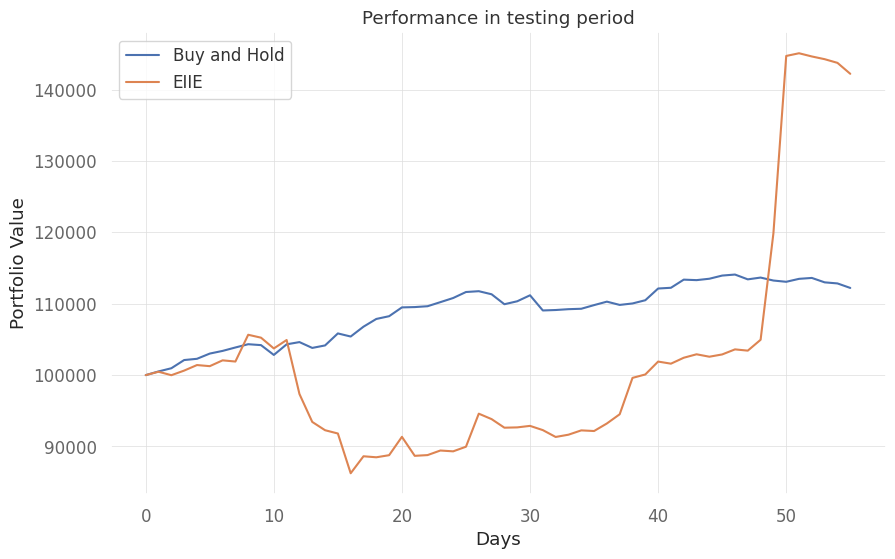

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(UBAH_results["test"], label="Buy and Hold")
plt.plot(EIIE_results["test"], label="EIIE")

plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.title("Performance in testing period")
plt.legend()

plt.show()

In [11]:
from finrl.meta.preprocessor.preprocessors import FeatureEngineer
from finrl.config import INDICATORS
import numpy as np
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

BEFORE CLEAN:             date     open     high      low    close  volume   tic  day
0     2019-12-10  1390.00  1445.00  1390.00  1425.00   50000  PANS    1
1     2019-12-10   272.02   272.02   267.03   269.53  338995  ARTO    1
2     2019-12-10    50.00    50.00    50.00    50.00   36700  BAPI    1
3     2019-12-10   117.05   117.05   117.05   117.05    1837  BEKS    1
4     2019-12-10    64.00    69.00    64.00    67.00  380000  BCIP    1
...          ...      ...      ...      ...      ...     ...   ...  ...
50195 2021-12-30   990.00   990.00   970.00   970.00   15800  MFMI  502
50196 2021-12-30  7600.00  8000.00  7600.00  7800.00   76900  MLBI  502
50197 2021-12-30  2480.00  2480.00  2480.00  2480.00       0  MSIN  502
50198 2021-12-30   222.00   222.00   218.00   220.00   91500  TOTO  502
50199 2021-12-30   410.00   414.00   410.00   414.00  196600  ZONE  502

[50200 rows x 8 columns]

AFTER CLEAN:           date    open    high     low   close     volume   tic  day
0   2019-12-1

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 72.10it/s]



boll_ub


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 72.20it/s]



boll_lb


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 72.35it/s]



rsi_30


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 69.57it/s]



cci_30


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.42it/s]



dx_30


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 45.14it/s]



close_30_sma


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 78.00it/s]



close_60_sma


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 78.14it/s]


Successfully added technical indicators
Successfully added turbulence index


In [13]:
# import os
# d = "tuntun_processed_data"
# os.makedirs(d, exist_ok=True)
# processed.to_csv(f"{d}/tic_100_indicator_8_2020-2021.csv")